In [1]:
import sys
sys.path.append('../FastCCI')

In [2]:
import fastcci.core as core

Loading cached files.


In [3]:
cpdb_file_path = './db/v4.1.0/'
meta_file_path = '../examples/metadata.tsv'
counts_file_path = '../examples/normalised_log_counts.h5ad'
convert_type = 'hgnc_symbol'

## Cauchy combination

In [4]:
core.Cauchy_combination_of_statistical_analysis_methods(
    cpdb_file_path, 
    meta_file_path,
    counts_file_path,
    convert_type,
    cluster_distrib_method_list = ['Mean', 'Quantile_0.9'],
    complex_distrib_method_list = ['Minimum'],
    LR_distrib_method_list = ['Arithmetic', 'Geometric'],
    save_path = '../fastcci_output',
    use_DEG = True
)

Results will be saved at ../fastcci_output
Read Time:  1.890314742922783
reading_count	714.86MB
get_input_data_peak	731.64MB


/net/mulan/home/siyuh/Projects/FastCCI/FastCCI/fastcci/core.py:661: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  interactions_strength = (p1>threshold) * (p2>threshold)


Running:
-> Mean for celltype cluster.
-> Minimum for complex proteins.
-> Arithmetic for L-R score.
-> Percentile is 0.1.
Running:
-> Mean for celltype cluster.
-> Minimum for complex proteins.
-> Geometric for L-R score.
-> Percentile is 0.1.
-> Adjusted percentile is 0.1


/net/mulan/home/siyuh/Projects/FastCCI/FastCCI/fastcci/core.py:661: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  interactions_strength = (p1>threshold) * (p2>threshold)


Running:
-> Quantile for celltype cluster.
-> Minimum for complex proteins.
-> Arithmetic for L-R score.
-> Percentile is 0.1.
Running:
-> Quantile for celltype cluster.
-> Minimum for complex proteins.
-> Geometric for L-R score.
-> Percentile is 0.1.


Max error (compared with CPDB): 4.1739654532690906e-07


/tmp/ipykernel_2552665/84905168.py:30: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_2552665/84905168.py:30: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_2552665/84905168.py:35: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
/tmp/ipykernel_2552665/84905168.py:35: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)


Text(0.5, 1.0, '-$\\log(p),p<0.05$')

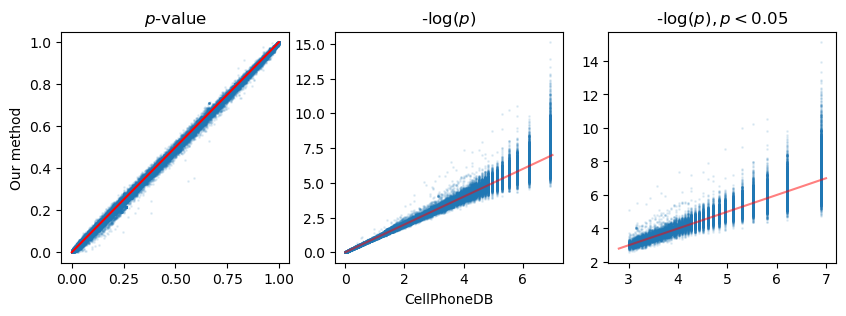

In [5]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import scienceplots

file = sorted(glob.glob('../fastcci_output/*Quantile_Minimum_Arithmetic*.csv'))
interactions_strength = pd.read_csv(file[0], index_col=0, header=0)
percents_analysis = pd.read_csv(file[1], index_col=0, header=0)
pvals = pd.read_csv(file[2], index_col=0, header=0)

error = (
    interactions_strength.values - 
    pd.read_csv('../examples/1k_t20_qt/statistical_analysis_means_06_07_2024_105636.txt', sep='\t', index_col=0).iloc[:,10:].T.values)
print("Max error (compared with CPDB):",np.max(np.abs(error)))


# plt.style.use('science')
gt_df = pd.read_csv('../examples/1k_t20_qt/statistical_analysis_pvalues_06_07_2024_105636.txt', sep='\t', index_col=0).iloc[:,10:].T
# gt_df = pd.read_csv('./results/method2/statistical_analysis_pvalues_01_23_2024_184314.txt', sep='\t', index_col=0).iloc[:,10:].T
pgt = gt_df.values[np.where(percents_analysis)]
est = pvals.values[np.where(percents_analysis)]
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.scatter(pgt,est,s=1, alpha=0.1)
plt.plot((0,1),(0,1), c='r')
plt.ylabel('Our method')
plt.title('$p$-value')
plt.subplot(1,3,2)
plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
plt.xlabel('CellPhoneDB')
plt.title('-$\log(p)$')
plt.plot((0,7),(0,7), c='r', alpha=0.5)
plt.subplot(1,3,3)
plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
plt.plot((2.8,7),(2.8,7), c='r', alpha=0.5)
plt.title('-$\log(p),p<0.05$')

Max error (compared with CPDB): 4.6801860209555457e-07


/tmp/ipykernel_2552665/3139001124.py:30: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_2552665/3139001124.py:30: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_2552665/3139001124.py:35: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
/tmp/ipykernel_2552665/3139001124.py:35: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)


Text(0.5, 1.0, '-$\\log(p),p<0.05$')

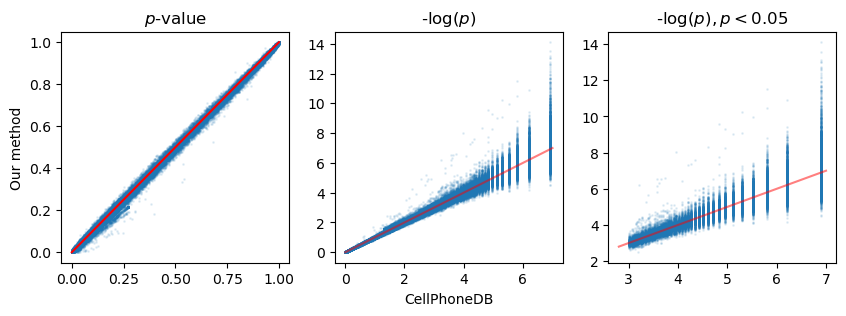

In [6]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import scienceplots

file = sorted(glob.glob('../fastcci_output/*Quantile_Minimum_Geometric*.csv'))
interactions_strength = pd.read_csv(file[0], index_col=0, header=0)
percents_analysis = pd.read_csv(file[1], index_col=0, header=0)
pvals = pd.read_csv(file[2], index_col=0, header=0)

error = (
    interactions_strength.values - 
    pd.read_csv('../examples/1k_t20_qt_multiply/statistical_analysis_means_06_10_2024_205606.txt', sep='\t', index_col=0).iloc[:,10:].T.values)
print("Max error (compared with CPDB):",np.max(np.abs(error)))


# plt.style.use('science')
gt_df = pd.read_csv('../examples/1k_t20_qt_multiply/statistical_analysis_pvalues_06_10_2024_205606.txt', sep='\t', index_col=0).iloc[:,10:].T
# gt_df = pd.read_csv('./results/method2/statistical_analysis_pvalues_01_23_2024_184314.txt', sep='\t', index_col=0).iloc[:,10:].T
pgt = gt_df.values[np.where(percents_analysis)]
est = pvals.values[np.where(percents_analysis)]
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.scatter(pgt,est,s=1, alpha=0.1)
plt.plot((0,1),(0,1), c='r')
plt.ylabel('Our method')
plt.title('$p$-value')
plt.subplot(1,3,2)
plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
plt.xlabel('CellPhoneDB')
plt.title('-$\log(p)$')
plt.plot((0,7),(0,7), c='r', alpha=0.5)
plt.subplot(1,3,3)
plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
plt.plot((2.8,7),(2.8,7), c='r', alpha=0.5)
plt.title('-$\log(p),p<0.05$')
# plt.savefig('pval.png')

## Single branch

In [4]:
interactions_strength, pvals, percents_analysis = core.statistical_analysis_method(
    cpdb_file_path, 
    meta_file_path,
    counts_file_path,
    convert_type
)

Read Time:  2.1584036722779274
reading_count	683.96MB
get_input_data_peak	759.17MB


/home/housy/Projects/CCC/fastcci_github/notebooks/../FastCCI/fastcci/core.py:526: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  interactions_strength = (p1>threshold) * (p2>threshold)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

error = (
    interactions_strength.values - 
    pd.read_csv('./examples/1k_t20/statistical_analysis_means_05_02_2024_144734.txt', sep='\t', index_col=0).iloc[:,10:].T.values)
print(np.max(np.abs(error)))

1.1733825684423493e-06


/tmp/ipykernel_16581/157499285.py:19: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_16581/157499285.py:19: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_16581/157499285.py:24: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
/tmp/ipykernel_16581/157499285.py:24: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)


Text(0.5, 1.0, '-$\\log(p),p<0.05$')

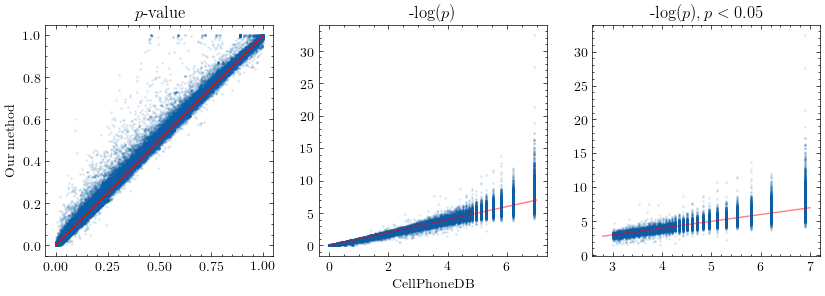

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

plt.style.use('science')

gt_df = pd.read_csv('./examples/1k_t20/statistical_analysis_pvalues_05_02_2024_144734.txt', sep='\t', index_col=0).iloc[:,10:].T
# gt_df = pd.read_csv('./results/method2/statistical_analysis_pvalues_01_23_2024_184314.txt', sep='\t', index_col=0).iloc[:,10:].T
pgt = gt_df.values[np.where(percents_analysis)]
est = pvals.values[np.where(percents_analysis)]
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.scatter(pgt,est,s=1, alpha=0.1)
plt.plot((0,1),(0,1), c='r')
plt.ylabel('Our method')
plt.title('$p$-value')
plt.subplot(1,3,2)
plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
plt.xlabel('CellPhoneDB')
plt.title('-$\log(p)$')
plt.plot((0,7),(0,7), c='r', alpha=0.5)
plt.subplot(1,3,3)
plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
plt.plot((2.8,7),(2.8,7), c='r', alpha=0.5)
plt.title('-$\log(p),p<0.05$')
# plt.savefig('pval.png')

In [7]:
interactions_strength, pvals, percents_analysis = core.statistical_analysis_method(
    cpdb_file_path, 
    meta_file_path,
    counts_file_path,
    convert_type,
    cluster_distrib_method = 'Quantile',
    quantile = 0.9
)

Read Time:  2.2226016968488693
reading_count	1638.38MB
get_input_data_peak	1711.56MB


/home/housy/Projects/CCC/fastcci_github/notebooks/../FastCCI/fastcci/core.py:526: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  interactions_strength = (p1>threshold) * (p2>threshold)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

error = (
    interactions_strength.values - 
    pd.read_csv('./examples/1k_t20_qt/statistical_analysis_means_06_07_2024_105636.txt', sep='\t', index_col=0).iloc[:,10:].T.values)
print(np.max(np.abs(error)))

4.1739654532690906e-07


/tmp/ipykernel_16581/15604199.py:19: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_16581/15604199.py:19: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_16581/15604199.py:24: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
/tmp/ipykernel_16581/15604199.py:24: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)


Text(0.5, 1.0, '-$\\log(p),p<0.05$')

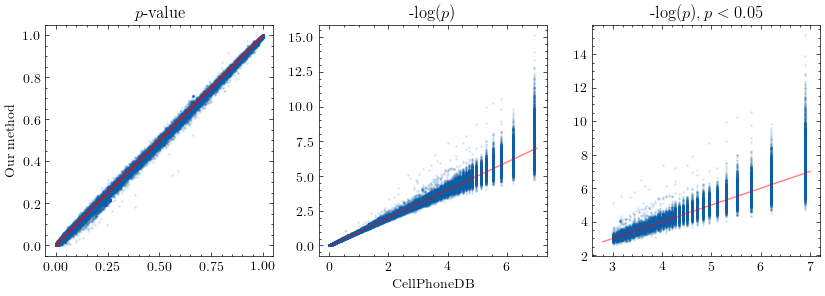

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

plt.style.use('science')

gt_df = pd.read_csv('./examples/1k_t20_qt/statistical_analysis_pvalues_06_07_2024_105636.txt', sep='\t', index_col=0).iloc[:,10:].T
# gt_df = pd.read_csv('./results/method2/statistical_analysis_pvalues_01_23_2024_184314.txt', sep='\t', index_col=0).iloc[:,10:].T
pgt = gt_df.values[np.where(percents_analysis)]
est = pvals.values[np.where(percents_analysis)]
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.scatter(pgt,est,s=1, alpha=0.1)
plt.plot((0,1),(0,1), c='r')
plt.ylabel('Our method')
plt.title('$p$-value')
plt.subplot(1,3,2)
plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
plt.xlabel('CellPhoneDB')
plt.title('-$\log(p)$')
plt.plot((0,7),(0,7), c='r', alpha=0.5)
plt.subplot(1,3,3)
plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
plt.plot((2.8,7),(2.8,7), c='r', alpha=0.5)
plt.title('-$\log(p),p<0.05$')
# plt.savefig('pval.png')

In [10]:
interactions_strength, pvals, percents_analysis = core.statistical_analysis_method(
    cpdb_file_path, 
    meta_file_path,
    counts_file_path,
    convert_type,
    cluster_distrib_method = 'Quantile',
    LR_distrib_method = 'Geometric',
    quantile = 0.9
)

Read Time:  2.2116357013583183
reading_count	2153.95MB
get_input_data_peak	2153.98MB


/home/housy/Projects/CCC/fastcci_github/notebooks/../FastCCI/fastcci/core.py:526: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead.
  interactions_strength = (p1>threshold) * (p2>threshold)


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

error = (
    interactions_strength.values - 
    # pd.read_csv('./results/1k_t20/statistical_analysis_means_05_07_2024_113535.txt', sep='\t', index_col=0).iloc[:,10:].T.values - 
    pd.read_csv('./examples/1k_t20_qt_multiply/statistical_analysis_means_06_10_2024_205606.txt', sep='\t', index_col=0).iloc[:,10:].T.values)
print(np.max(np.abs(error)))

4.6801860209555457e-07


/tmp/ipykernel_16581/519958190.py:19: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_16581/519958190.py:19: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
/tmp/ipykernel_16581/519958190.py:24: RuntimeWarning: divide by zero encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
/tmp/ipykernel_16581/519958190.py:24: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)


Text(0.5, 1.0, '-$\\log(p),p<0.05$')

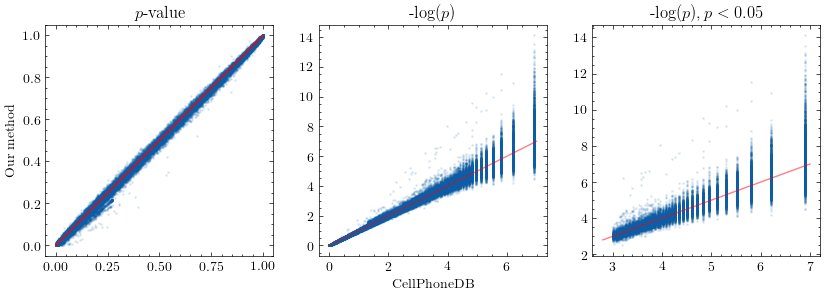

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

plt.style.use('science')

gt_df = pd.read_csv('./examples/1k_t20_qt_multiply/statistical_analysis_pvalues_06_10_2024_205606.txt', sep='\t', index_col=0).iloc[:,10:].T
# gt_df = pd.read_csv('./results/method2/statistical_analysis_pvalues_01_23_2024_184314.txt', sep='\t', index_col=0).iloc[:,10:].T
pgt = gt_df.values[np.where(percents_analysis)]
est = pvals.values[np.where(percents_analysis)]
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.scatter(pgt,est,s=1, alpha=0.1)
plt.plot((0,1),(0,1), c='r')
plt.ylabel('Our method')
plt.title('$p$-value')
plt.subplot(1,3,2)
plt.scatter(-np.log(pgt), -np.log(est), s=1, alpha=0.1)
plt.xlabel('CellPhoneDB')
plt.title('-$\log(p)$')
plt.plot((0,7),(0,7), c='r', alpha=0.5)
plt.subplot(1,3,3)
plt.scatter(-np.log(pgt[pgt<0.05]), -np.log(np.array(est)[pgt<0.05]), s=1, alpha=0.1)
plt.plot((2.8,7),(2.8,7), c='r', alpha=0.5)
plt.title('-$\log(p),p<0.05$')
# plt.savefig('pval.png')